In [ ]:
name = "Gemma Qin"
date_returned = "24.03.2023"

# Lab 7. Numerical integration
Hardware 2 course - Mathematics and Physics<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

## Setup

Read necessary libraries and functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Estimate the value of the following integrals

a) $S_1 = \int_0^5 \left( x^2 + 2x \right) dx$

b) $S_2 = \int_0^\pi sin(x) dx$

[0.         0.83333333 1.66666667 2.5        3.33333333 4.16666667
 5.        ]
[ 0.          2.36111111  6.11111111 11.25       17.77777778 25.69444444
 35.        ]
S = 67.2
Area = 87.5


<function matplotlib.pyplot.show(close=None, block=None)>

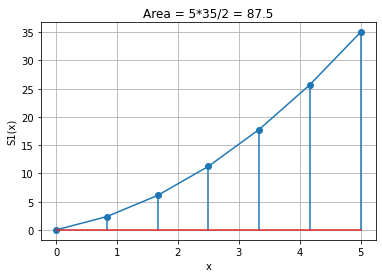

In [2]:
# a)
def s1(x):
    return x**2+2*x

x = np.linspace(0, 5, 7)
print(x)
integral_value = s1(x)
print(integral_value)

S = 0
for i in np.arange(len(x)-1):
    a = x[i]
    b = x[i+1]
    S = S + (b - a)*(s1(a) + s1(b))/2

print(f'S = {S:.1f}')
A = 5*35/2
print(f'Area = {A:.1f}')

plt.plot(x, s1(x))
plt.stem(x, s1(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('S1(x)')
plt.title(f'Area = 5*35/2 = {5*35/2}')
plt.show()

[0.         1.04719755 2.0943951  3.14159265]
[0.00000000e+00 8.66025404e-01 8.66025404e-01 1.22464680e-16]
S = 1.8
Area = 1.8


<function matplotlib.pyplot.show(close=None, block=None)>

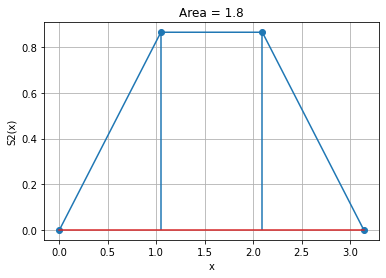

In [3]:
# b)
def s2(x):
    return np.sin(x)

x = np.linspace(0., np.pi, 4)
print(x)
integral_value = s2(x)
print(integral_value)

S = 0
for i in np.arange(len(x)-1):
    a = x[i]
    b = x[i+1]
    S = S + (b - a)*(s2(a) + s2(b))/2

print(f'S = {S:.1f}')
A = (1.04719755*8.66025404e-01)/2 + (2.0943951-1.04719755)*8.66025404e-01 + (3.14159265-2.0943951)*8.66025404e-01/2
print(f'Area = {A:.1f}')

plt.plot(x, s2(x))
plt.stem(x, s2(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('S2(x)')
plt.title(f'Area = {A:.1f}')
plt.show()

## Problem 2

Estimate the position from 0 to 10 s, when the velocity is given by

a) $v_1(t)= -9.81 \cdot t$

b) $v_2(t) = -0.5t^2 + 5t$

Use time step $t_s = 0.01$

Plot both the velocity and the estimate position.

<function matplotlib.pyplot.show(close=None, block=None)>

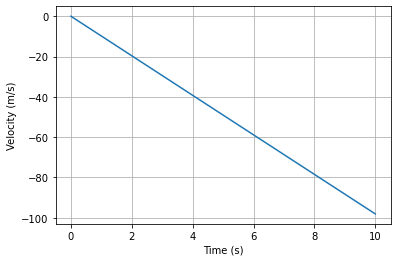

In [4]:
# a)
ts = 0.01
t = np.arange(0, 10.01, ts)
v1 = -9.81*t

plt.plot(t, v1)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

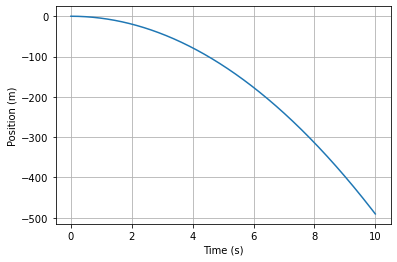

In [5]:
p1 = np.zeros(len(t))
N1 = len(p1)
for n in np.arange(N1-1):
    p1[n+1] = p1[n] + ts*(v1[n+1] + v1[n])/2
    
plt.plot(t, p1)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

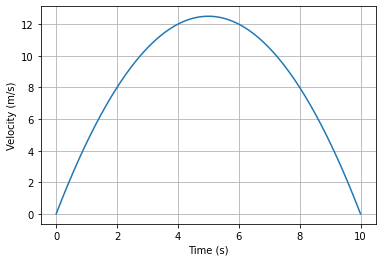

In [9]:
# b)
ts = 0.01
t = np.arange(0, 10.01, ts)
v2 = 5*t - 0.5*(t**2)
plt.plot(t, v2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

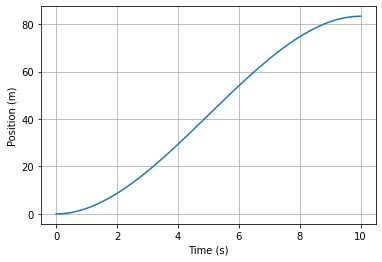

In [7]:
p2 = np.zeros(len(t))
N2 = len(p2)
for n in np.arange(N2-1):
    p2[n+1] = p2[n] + ts*(v2[n+1] + v2[n])/2
    
plt.plot(t, p2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()

## Problem 3

Collect the accelerometer data using [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/details?id=com.chrystianvieyra.physicstoolboxsuite&hl=en&gl=US) mobile application.

1. Step into the elevator at the campus to collect the accelerometer (g-force) data. 
1. Drive with the elevator between the floors. 
1. Send the collected data to yourself by email. 
1. Estimate the position of the drive numerically using Python.

Draw plots of the acceleration, velocity, and position data.


In [2]:
from pathlib import Path
import pandas as pd

#Import data
file = Path('sensor2_2Hz_lowpass_filter.csv')

#Read the data
df = pd.read_csv('sensor2_2Hz_lowpass_filter.csv',
                 sep= ' ',
                 index_col = False)

df.head()

,0.002834081649780273,-0.0003928001148703265,-0.0008469431008844269,-0.003297355285435234
0,0.010407,-0.000746,-0.001463,-0.005984
1,0.020633,-0.000363,-0.000917,-0.005194
2,0.031784,-0.000066,-0.001117,-0.006787
3,0.040765,0.000176,-0.000871,-0.005789
4,0.065588,0.000114,-0.000953,-0.005221


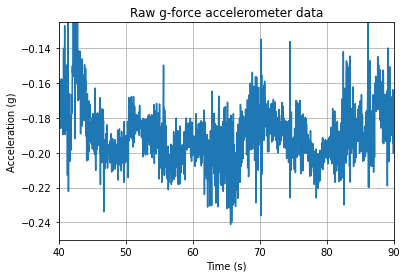

In [70]:
#Converting the numpy arrays
t = df['time'].values
gFy = df['gFy'].values

plt.plot(t, gFy)
plt.title('Raw g-force accelerometer data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.xlim(40, 90)
plt.ylim(-0.25, -0.125)
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

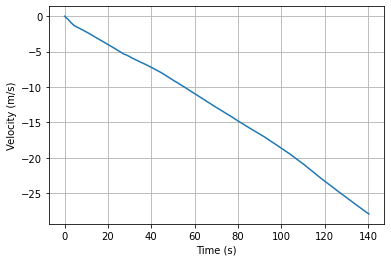

In [71]:
#Velocity
ts = 0.01
v3 = np.zeros(len(t))
N31 = len(v3)
for n in np.arange(N31-1):
    v3[n+1] = v3[n] + ts*(gFy[n+1] + gFy[n])/2
    
plt.plot(t, v3)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

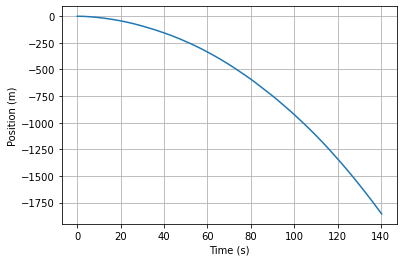

In [72]:
#Position
ts = 0.01
p3 = np.zeros(len(t))
N32 = len(p3)
for n in np.arange(N32-1):
    p3[n+1] = p3[n] + ts*(v3[n+1] + v3[n])/2

plt.plot(t, p3)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show

## Problem 4

Collect the accelerometer data using [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/details?id=com.chrystianvieyra.physicstoolboxsuite&hl=en&gl=US) mobile application.

1. Place your mobile phone on a table (e.g. on a flat surface).
1. Repeate a figure (for example circle) with your mobile by moving it on the surface several times (5-10x).
1. Send the collected data to yourself by email. 
1. Estimate the 2D position (x and y coordinates) of your movement numerically using Python.

Draw plots of the acceleration, velocity and position data.

In [37]:
from pathlib import Path
import pandas as pd

#Import data
file = Path('sensor3.csv')
file.write_text(file.read_text().replace(',',' ').replace('-','-'))

#Read the data
df = pd.read_csv('sensor3.csv',
                 sep= ' ',
                 index_col = False)

df.head()

,time,ax,ay,az,atotal
0,0.004060,0.03,0.02,-0.08,0.08
1,0.019232,0.02,0.00,-0.07,0.07
2,0.021393,0.02,0.01,-0.01,0.02
3,0.030479,0.02,0.00,-0.02,0.02
4,0.041164,0.02,0.01,-0.02,0.03


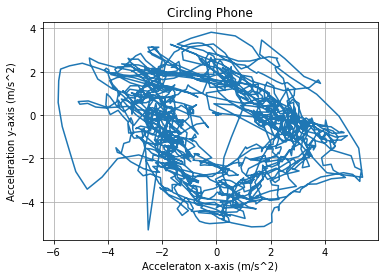

In [46]:
#Converting the numpy arrays
t = df['time'].values
ax = df['ax'].values
ay = df['ay'].values
atotal = df['atotal'].values

plt.plot(ax, ay)
plt.title('Circling Phone')
plt.xlabel('Acceleraton x-axis (m/s^2)')
plt.ylabel('Acceleration y-axis (m/s^2)')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

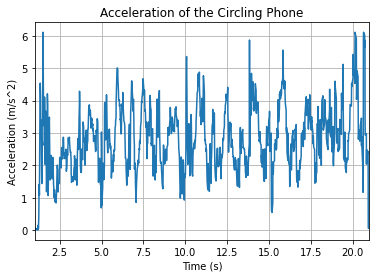

In [56]:
# Acceleration
plt.plot(t, atotal)
plt.grid()
plt.title('Acceleration of the Circling Phone')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.xlim(1, 21)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

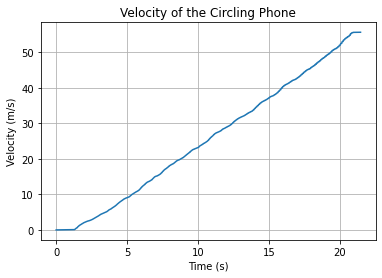

In [54]:
# Velocity
ts = 0.01
v4 = np.zeros(len(t))
N41 = len(v4)
for n in np.arange(N41-1):
    v4[n+1] = v4[n] + ts*(atotal[n+1] + atotal[n])/2

plt.plot(t, v4)
plt.grid()
plt.title('Velocity of the Circling Phone')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

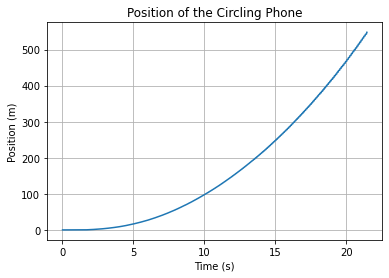

In [55]:
# Position
ts = 0.01
p4 = np.zeros(len(t))
N42 = len(p4)
for n in np.arange(N42-1):
    p4[n+1] = p4[n] + ts*(v4[n+1] + v4[n])/2
    
plt.plot(t, p4)
plt.grid()
plt.title('Position of the Circling Phone')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show